In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\pvrao\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


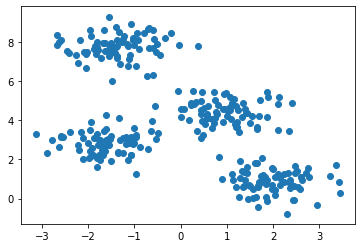

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

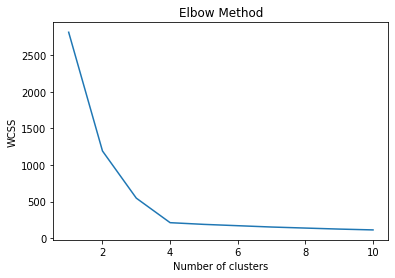

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

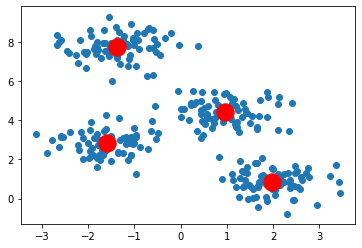

In [4]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [5]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

# Generate 2D data points
X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449


In [6]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [7]:
# A helper function to calculate the Euclidean diatance between the data 
# points and the centroids

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [8]:
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
print(data.head())

     Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 1  1.005079  4.594642     2.091397     3.320997     2.318921
1  Object 2  1.128478  4.328122     2.153620     3.124601     2.025236
2  Object 3  2.117881  0.726845     4.520479     2.443428     1.777070
3  Object 4  0.955626  4.385907     1.993339     3.108686     2.155774
4  Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823


In [10]:
# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)
    
    # Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})
    
    # Get a preview of the data
print(data.head(10))


      Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0   Object 1  1.005079  4.594642     2.091397     3.320997     2.318921   
1   Object 2  1.128478  4.328122     2.153620     3.124601     2.025236   
2   Object 3  2.117881  0.726845     4.520479     2.443428     1.777070   
3   Object 4  0.955626  4.385907     1.993339     3.108686     2.155774   
4   Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823   
5   Object 6 -1.072953  2.627009     1.374928     1.425551     3.075577   
6   Object 7 -2.037502  3.048606     1.407679     2.403038     4.074603   
7   Object 8  2.354083  0.856632     4.596807     2.633869     1.681081   
8   Object 9  2.144040  0.964399     4.370339     2.404453     1.542342   
9  Object 10  1.166288  4.273516     2.183487     3.091785     1.959703   

  Cluster  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     NaN  


In [11]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (nan, nan)
Centroid 2 (nan, nan)


In [12]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [13]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[ 1.06386762  4.39554682]
 [ 2.20533486  0.84929168]
 [-1.48815728  2.81502145]]
[0 0 1 0 2 2 2 1 1 0]


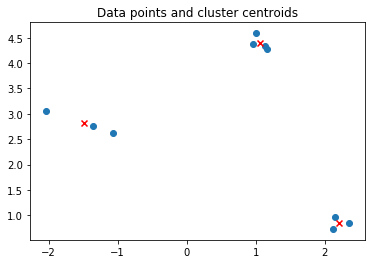

In [14]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [15]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873337


In [16]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   

SyntaxError: invalid syntax (<ipython-input-16-d75bc0ee0a1c>, line 13)